In [1]:
%reset -f

# load packages

In [2]:
from linearmodels.panel           import PooledOLS, RandomEffects, compare, FirstDifferenceOLS
from linearmodels                 import PanelOLS
from linearmodels.iv.model        import IV2SLS
from statsmodels.stats.diagnostic import het_white, het_breuschpagan
from statsmodels.stats.stattools  import durbin_watson
from scipy                        import stats

import numpy.linalg      as la
import matplotlib.pyplot as plt
import numpy             as np
import pandas            as pd
import statsmodels.api   as sm

# load data

In [3]:
data = pd.read_csv("CRIME4.csv")

# check variable names

In [4]:
data.columns

Index(['county', 'year', 'crmrte', 'prbarr', 'prbconv', 'prbpris', 'avgsen',
       'polpc', 'density', 'taxpc', 'west', 'central', 'urban', 'pctmin80',
       'wcon', 'wtuc', 'wtrd', 'wfir', 'wser', 'wmfg', 'wfed', 'wsta', 'wloc',
       'mix', 'pctymle', 'd82', 'd83', 'd84', 'd85', 'd86', 'd87', 'lcrmrte',
       'lprbarr', 'lprbconv', 'lprbpris', 'lavgsen', 'lpolpc', 'ldensity',
       'ltaxpc', 'lwcon', 'lwtuc', 'lwtrd', 'lwfir', 'lwser', 'lwmfg', 'lwfed',
       'lwsta', 'lwloc', 'lmix', 'lpctymle', 'lpctmin', 'clcrmrte', 'clprbarr',
       'clprbcon', 'clprbpri', 'clavgsen', 'clpolpc', 'cltaxpc', 'clmix'],
      dtype='object')

# keep $year \leqslant 1984$

<AxesSubplot:>

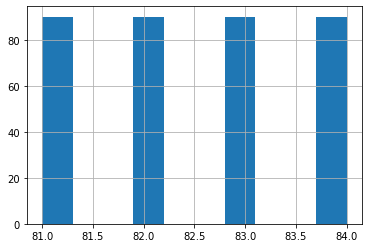

In [5]:
data = data[data['year']<=84]

data['year'].hist()

# keep $year \geqslant 1984$

<AxesSubplot:>

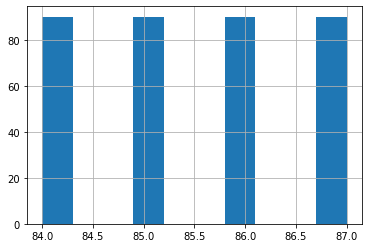

In [6]:
data = pd.read_csv("CRIME4.csv")

data = data[data['year']>=84]

data['year'].hist()

# (c) FD

In [7]:
data = data.set_index(['county', 'year'])

In [8]:
exog_vars = ['lprbarr', 'lprbconv', 'lprbpris', 'lavgsen', 'lpolpc', 'ldensity']

exog = data[exog_vars]

mod_fd = FirstDifferenceOLS(data.lcrmrte, exog)

fd_res = mod_fd.fit()
fd_robust_res = mod_fd.fit(cov_type='robust')

print(fd_res)

                     FirstDifferenceOLS Estimation Summary                      
Dep. Variable:                lcrmrte   R-squared:                        0.4391
Estimator:         FirstDifferenceOLS   R-squared (Between):              0.7455
No. Observations:                 270   R-squared (Within):               0.4096
Date:                Sat, Oct 30 2021   R-squared (Overall):              0.7449
Time:                        18:49:14   Log-likelihood                    99.156
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      34.449
Entities:                          90   P-value                           0.0000
Avg Obs:                       4.0000   Distribution:                   F(6,264)
Min Obs:                       4.0000                                           
Max Obs:                       4.0000   F-statistic (robust):             34.449
                            

/usr/local/Caskroom/miniforge/base/lib/python3.9/site-packages/linearmodels/shared/utility.py:187: FutureWarning: In a future version of pandas all arguments of MultiIndex.set_levels except for the argument 'levels' will be keyword-only
  df.index = df.index.set_levels(final_levels, [0, 1])


In [9]:
print(fd_robust_res)

                     FirstDifferenceOLS Estimation Summary                      
Dep. Variable:                lcrmrte   R-squared:                        0.4391
Estimator:         FirstDifferenceOLS   R-squared (Between):              0.7455
No. Observations:                 270   R-squared (Within):               0.4096
Date:                Sat, Oct 30 2021   R-squared (Overall):              0.7449
Time:                        18:49:14   Log-likelihood                    99.156
Cov. Estimator:                Robust                                           
                                        F-statistic:                      34.449
Entities:                          90   P-value                           0.0000
Avg Obs:                       4.0000   Distribution:                   F(6,264)
Min Obs:                       4.0000                                           
Max Obs:                       4.0000   F-statistic (robust):             9.1856
                            

# (c) POLS

In [10]:
exog = sm.add_constant(data[exog_vars])

mod_ols = PooledOLS(data.lcrmrte, exog)

pooled_res = mod_ols.fit()

print(pooled_res)  

                          PooledOLS Estimation Summary                          
Dep. Variable:                lcrmrte   R-squared:                        0.6280
Estimator:                  PooledOLS   R-squared (Between):              0.6628
No. Observations:                 360   R-squared (Within):               0.1340
Date:                Sat, Oct 30 2021   R-squared (Overall):              0.6280
Time:                        18:49:14   Log-likelihood                   -140.52
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      99.339
Entities:                          90   P-value                           0.0000
Avg Obs:                       4.0000   Distribution:                   F(6,353)
Min Obs:                       4.0000                                           
Max Obs:                       4.0000   F-statistic (robust):             99.339
                            

In [11]:
pooled_robust_res = mod_ols.fit(cov_type='robust')
print(pooled_robust_res)

                          PooledOLS Estimation Summary                          
Dep. Variable:                lcrmrte   R-squared:                        0.6280
Estimator:                  PooledOLS   R-squared (Between):              0.6628
No. Observations:                 360   R-squared (Within):               0.1340
Date:                Sat, Oct 30 2021   R-squared (Overall):              0.6280
Time:                        18:49:14   Log-likelihood                   -140.52
Cov. Estimator:                Robust                                           
                                        F-statistic:                      99.339
Entities:                          90   P-value                           0.0000
Avg Obs:                       4.0000   Distribution:                   F(6,353)
Min Obs:                       4.0000                                           
Max Obs:                       4.0000   F-statistic (robust):             155.37
                            

# (c) RE

In [12]:
mod_re = RandomEffects(data.lcrmrte, exog)

re_res = mod_re.fit()
re_robust_res = mod_re.fit(cov_type='robust')

print(re_res)

                        RandomEffects Estimation Summary                        
Dep. Variable:                lcrmrte   R-squared:                        0.4742
Estimator:              RandomEffects   R-squared (Between):              0.6113
No. Observations:                 360   R-squared (Within):               0.3923
Date:                Sat, Oct 30 2021   R-squared (Overall):              0.5969
Time:                        18:49:15   Log-likelihood                    203.03
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      53.057
Entities:                          90   P-value                           0.0000
Avg Obs:                       4.0000   Distribution:                   F(6,353)
Min Obs:                       4.0000                                           
Max Obs:                       4.0000   F-statistic (robust):             53.057
                            

In [13]:
print(re_robust_res)

                        RandomEffects Estimation Summary                        
Dep. Variable:                lcrmrte   R-squared:                        0.4742
Estimator:              RandomEffects   R-squared (Between):              0.6113
No. Observations:                 360   R-squared (Within):               0.3923
Date:                Sat, Oct 30 2021   R-squared (Overall):              0.5969
Time:                        18:49:15   Log-likelihood                    203.03
Cov. Estimator:                Robust                                           
                                        F-statistic:                      53.057
Entities:                          90   P-value                           0.0000
Avg Obs:                       4.0000   Distribution:                   F(6,353)
Min Obs:                       4.0000                                           
Max Obs:                       4.0000   F-statistic (robust):             41.001
                            

# (c) FE

In [14]:
mod_fe = PanelOLS(data.lcrmrte, exog, entity_effects=True)

fe_res = mod_fe.fit()
fe_robust_res = mod_fe.fit(cov_type='robust')

print(fe_res)

                          PanelOLS Estimation Summary                           
Dep. Variable:                lcrmrte   R-squared:                        0.4125
Estimator:                   PanelOLS   R-squared (Between):             -2.2427
No. Observations:                 360   R-squared (Within):               0.4125
Date:                Sat, Oct 30 2021   R-squared (Overall):             -2.0683
Time:                        18:49:15   Log-likelihood                    267.34
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      30.894
Entities:                          90   P-value                           0.0000
Avg Obs:                       4.0000   Distribution:                   F(6,264)
Min Obs:                       4.0000                                           
Max Obs:                       4.0000   F-statistic (robust):             30.894
                            

In [15]:
print(fe_robust_res)

                          PanelOLS Estimation Summary                           
Dep. Variable:                lcrmrte   R-squared:                        0.4125
Estimator:                   PanelOLS   R-squared (Between):             -2.2427
No. Observations:                 360   R-squared (Within):               0.4125
Date:                Sat, Oct 30 2021   R-squared (Overall):             -2.0683
Time:                        18:49:15   Log-likelihood                    267.34
Cov. Estimator:                Robust                                           
                                        F-statistic:                      30.894
Entities:                          90   P-value                           0.0000
Avg Obs:                       4.0000   Distribution:                   F(6,264)
Min Obs:                       4.0000                                           
Max Obs:                       4.0000   F-statistic (robust):             12.184
                            

# (c) comparison table

In [16]:
print(compare({"FE": fe_res, "RE": re_res, "FD": fd_res, "Pooled": pooled_res}, precision='std_errors', stars=True))

                                       Model Comparison                                       
                                    FE                RE                     FD         Pooled
----------------------------------------------------------------------------------------------
Dep. Variable                  lcrmrte           lcrmrte                lcrmrte        lcrmrte
Estimator                     PanelOLS     RandomEffects     FirstDifferenceOLS      PooledOLS
No. Observations                   360               360                    270            360
Cov. Est.                   Unadjusted        Unadjusted             Unadjusted     Unadjusted
R-squared                       0.4125            0.4742                 0.4391         0.6280
R-Squared (Within)              0.4125            0.3923                 0.4096         0.1340
R-Squared (Between)            -2.2427            0.6113                 0.7455         0.6628
R-Squared (Overall)            -2.0683            

/usr/local/Caskroom/miniforge/base/lib/python3.9/site-packages/linearmodels/panel/results.py:1010: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  vals = concat(


In [17]:
print(compare({"FE_robust": fe_robust_res, "RE_robust": re_robust_res, "FD_robust": fd_robust_res, "Pooled_robust": pooled_robust_res}, precision='std_errors', stars=True))

                                       Model Comparison                                       
                             FE_robust         RE_robust              FD_robust  Pooled_robust
----------------------------------------------------------------------------------------------
Dep. Variable                  lcrmrte           lcrmrte                lcrmrte        lcrmrte
Estimator                     PanelOLS     RandomEffects     FirstDifferenceOLS      PooledOLS
No. Observations                   360               360                    270            360
Cov. Est.                       Robust            Robust                 Robust         Robust
R-squared                       0.4125            0.4742                 0.4391         0.6280
R-Squared (Within)              0.4125            0.3923                 0.4096         0.1340
R-Squared (Between)            -2.2427            0.6113                 0.7455         0.6628
R-Squared (Overall)            -2.0683            

# (d) test FE vs RE

In [18]:
b = fe_res.params[1:]
B = re_res.params[1:]

v_b = fe_res.cov.drop('const', axis=1)
v_b = v_b[1:]
v_B = re_res.cov.drop('const', axis=1)
v_B = v_B[1:]

df = b[np.abs(b) < 1e8].size
chi2 = np.dot((b-B).T, la.inv(v_b - v_B).dot(b - B)) 
pval = stats.chi2.sf(chi2, df)


dict = {'chi-sq stat' : [chi2],
        'df' : [df],
        'p-value' : [pval]}

Hausman_df = pd.DataFrame(dict)

Hausman_df.round(2)

,chi-sq stat,df,p-value
0,19.37,6,0.0


# (f) IV regression for FD (aka why linear modelling typically sucks in real life)

## * such regression comes with a negative R-squared; 

## * even though I found it completely preposterous from the perspective of statistics, quite a number of "economists" find it "quite normal and acceptale" in "econometrics modelling"

## * you have reached the boundary of "economic causal inference". To avoid such hilarious results, you need to use more advanced tools, one of them called "probablistic graph modelling"



In [19]:
data.sort_index(inplace=True)

data['D1_lcrmrte']  = data.groupby(['county'])['lcrmrte'].transform(lambda x: x.diff())
data['D1_lprbarr']  = data.groupby(['county'])['lprbarr'].transform(lambda x: x.diff())
data['D1_lprbconv'] = data.groupby(['county'])['lprbconv'].transform(lambda x: x.diff())
data['D1_lprbpris'] = data.groupby(['county'])['lprbpris'].transform(lambda x: x.diff())
data['D1_lavgsen']  = data.groupby(['county'])['lavgsen'].transform(lambda x: x.diff())
data['D1_lpolpc']   = data.groupby(['county'])['lpolpc'].transform(lambda x: x.diff())
data['D1_ldensity'] = data.groupby(['county'])['ldensity'].transform(lambda x: x.diff())
data['D1_ltaxpc']   = data.groupby(['county'])['ltaxpc'].transform(lambda x: x.diff())


In [20]:
exog_vars1 = ['D1_lprbarr', 'D1_lprbconv', 'D1_lprbpris', 'D1_lavgsen', 'D1_ldensity']

exog = sm.add_constant(data[exog_vars1])

FD2SLS = IV2SLS(dependent=data['D1_lcrmrte'],
                exog=exog,
                endog=data[['D1_lpolpc']],
                instruments=data[['D1_ltaxpc']]).fit()

print(FD2SLS.summary)

                          IV-2SLS Estimation Summary                          
Dep. Variable:             D1_lcrmrte   R-squared:                     -1.0836
Estimator:                    IV-2SLS   Adj. R-squared:                -1.1311
No. Observations:                 270   F-statistic:                    12.184
Date:                Sat, Oct 30 2021   P-value (F-stat)                0.0580
Time:                        18:49:15   Distribution:                  chi2(6)
Cov. Estimator:                robust                                         
                                                                              
                              Parameter Estimates                              
             Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------
const           0.0719     0.0657     1.0951     0.2735     -0.0568      0.2006
D1_lprbarr     -0.2190     0.1953    -1.1215    

/usr/local/Caskroom/miniforge/base/lib/python3.9/site-packages/linearmodels/shared/exceptions.py:35: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  warnings.warn(missing_value_warning_msg, MissingValueWarning)


# Hausman test for endogeneity

In [21]:
FD2SLS.wu_hausman()

Wu-Hausman test of exogeneity
H0: All endogenous variables are exogenous
Statistic: 1.0240
P-value: 0.3125
Distributed: F(1,262)
WaldTestStatistic, id: 0x1a1bb8e50

# (g) first stage of 2SLS

In [22]:
exog_vars = ['lprbarr', 'lprbconv', 'lprbpris', 'lavgsen', 'ltaxpc', 'ldensity']

exog = data[exog_vars]

exog = exog - exog.mean()
resp = data['lpolpc'] - data['lpolpc'].mean()

mod_fd = FirstDifferenceOLS(resp, exog)

fd_res = mod_fd.fit()

print(fd_res)  

                     FirstDifferenceOLS Estimation Summary                      
Dep. Variable:                 lpolpc   R-squared:                        0.2022
Estimator:         FirstDifferenceOLS   R-squared (Between):             -3.7170
No. Observations:                 270   R-squared (Within):               0.2341
Date:                Sat, Oct 30 2021   R-squared (Overall):             -2.9724
Time:                        18:49:15   Log-likelihood                   -32.498
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      11.153
Entities:                          90   P-value                           0.0000
Avg Obs:                       4.0000   Distribution:                   F(6,264)
Min Obs:                       4.0000                                           
Max Obs:                       4.0000   F-statistic (robust):             11.153
                            

/usr/local/Caskroom/miniforge/base/lib/python3.9/site-packages/linearmodels/shared/utility.py:187: FutureWarning: In a future version of pandas all arguments of MultiIndex.set_levels except for the argument 'levels' will be keyword-only
  df.index = df.index.set_levels(final_levels, [0, 1])


In [25]:
!rm -rf A2_Python.html
!jupyter nbconvert --to html A2_Python.ipynb

[NbConvertApp] Converting notebook A2_Python.ipynb to html
[NbConvertApp] Writing 663124 bytes to A2_Python.html
